In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
#!pip install category_encoders
import category_encoders as ce

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.base import ClassifierMixin

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss

# Utility
import os
import time
import datetime
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean

# !pip install bayesian-optimization
from bayes_opt import BayesianOptimization
#!pip install num2words
from num2words import num2words
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

In [4]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
international_trade = pd.read_csv('../data/international_trade.csv')

In [5]:
train.drop(columns = 'ID', inplace = True)
test.drop(columns = 'ID', inplace = True)

In [6]:
train.columns = ['timestamp', 'item', 'corporation', 'location', 'supply', 'price']

---

# Train Data
- time
    - timestamp : 2019년 01월 01일부터 2023년 03월 03일까지
---

- numeric feature
    - supply : 유통된 물량, kg 단위
    - price : 유통된 품목들의 kg 마다의 가격
    - 지역 코드 -->> J : 제주도 제주시 / S : 제주도 서귀포시
---
- categorical feature
    - item : 품목 코드 -->> TG : 감귤 / BC : 브로콜리 / RD : 무 / CR : 당근 / CB : 양배추
    - corporation : 유통 법인 코드, 법인 A부터 F 존재

# International_trade Data
- 기간
    - 

In [7]:
# 시계열 데이터 처리
train.timestamp = pd.to_datetime(train.timestamp)
test.timestamp = pd.to_datetime(test.timestamp)

# year
train['year'] = train.timestamp.dt.year
test['year'] = test.timestamp.dt.year

# month
train['month'] = train.timestamp.dt.month
test['month'] = test.timestamp.dt.month

# day
train['day'] = train.timestamp.dt.day
test['day'] = test.timestamp.dt.day

# week
train['week'] = train.timestamp.dt.dayofweek
test['week'] = test.timestamp.dt.dayofweek

# 주말여부
train['weekend'] = train.week.apply(lambda x : 1 if x in [1,2] else 0)
test['weekend'] = test.week.apply(lambda x : 1 if x in [1,2] else 0)

# date
train['date'] = train.timestamp.apply(lambda x : int(str(x)[5:7] + str(x)[8:10]))
test['date'] = test.timestamp.apply(lambda x : int(str(x)[5:7] + str(x)[8:10]))

# year_month
train['year_month'] = train.timestamp.apply(lambda x : str(x)[0:7])
test['year_month'] = test.timestamp.apply(lambda x : str(x)[0:7])

In [8]:
international_trade.groupby('기간').describe()

수출 중량                                                             \
        count           mean           std  min    25%     50%       75%   
기간                                                                         
2019-01  25.0  204860.200000  6.366537e+05  0.0   2.00   876.0  58368.00   
2019-02  23.0   79259.739130  1.951526e+05  0.0   0.00   520.0  28200.00   
2019-03  24.0  105394.333333  2.820900e+05  0.0   0.00    33.0   3707.25   
2019-04  24.0  317831.500000  1.322636e+06  0.0   0.00   300.0  12008.75   
2019-05  27.0  121452.444444  3.287269e+05  0.0   0.00    65.0  35631.50   
2019-06  27.0  551437.259259  2.025857e+06  0.0   8.50   104.0  14820.50   
2019-07  27.0  876870.333333  4.025714e+06  0.0   8.00   611.0  13473.50   
2019-08  27.0  525494.962963  1.522393e+06  0.0   0.00    34.0  20779.00   
2019-09  28.0  310438.428571  9.057400e+05  0.0   0.00   210.0  15901.00   
2019-10  25.0  507261.200000  1.611320e+06  0.0   0.00    60.0  17596.00   
2019-11  23.0  447252.173913  1.274805e+06  0.0   4.00   450.0  28153.50   
2019-12  25.0  289418.920000  1.073403e+06  0.0   0.00     5.0  27000.00   
2020-01  24.0  140036.416667  5.358422e+05  0.0   0.00    18.0  16140.25   
2020-02  25.0   87705.800000  3.085651e+05  0.0   0.00    82.0  18440.00   
2020-03  24.0   71634.125000  2.567650e+05  0.0   0.00    89.5   2924.00   
2020-04  23.0   46033.434783  1.296965e+05  0.0   0.00    40.0  14894.00   
2020-05  26.0   48489.653846  1.264992e+05  0.0  12.25   235.5  25569.00   
2020-06  26.0  202050.230769  6.296197e+05  0.0  21.50   337.0  13799.00   
2020-07  25.0  230168.000000  7.368391e+05  0.0  17.00  1334.0  27834.00   
2020-08  25.0  109133.400000  2.796950e+05  0.0   0.00   438.0  37182.00   
2020-09  25.0  194389.080000  8.696748e+05  0.0   0.00   505.0  14484.00   
2020-10  26.0  191154.884615  8.593569e+05  0.0   0.00   323.0   7602.50   
2020-11  23.0  369947.086957  1.128677e+06  0.0   5.00   498.0  11405.00   
2020-12  24.0  302595.333333  7.610019e+05  0.0   0.00     3.5   7982.50   
2021-01  24.0   89845.000000  2.500912e+05  0.0   0.00    59.5  14620.00   
2021-02  25.0   33187.400000  9.519199e+04  0.0   0.00   150.0  14400.00   
2021-03  23.0   31032.913043  8.856458e+04  0.0   9.50   438.0   6780.00   
2021-04  24.0   24659.791667  8.515970e+04  0.0   2.25   728.0   7650.75   
2021-05  27.0   23027.666667  7.706277e+04  0.0   0.00    20.0   5442.50   
2021-06  26.0  173164.038462  6.272118e+05  0.0   0.00  1524.0  19496.00   
2021-07  26.0  190497.615385  6.648463e+05  0.0   0.00   295.0   4956.00   
2021-08  26.0  232139.115385  6.821703e+05  0.0   3.25   554.0  25999.00   
2021-09  26.0  229140.923077  6.789893e+05  0.0   0.00    88.5  20295.00   
2021-10  25.0  336656.520000  1.079043e+06  0.0   0.00   110.0  31285.00   
2021-11  26.0  380789.692308  1.170268e+06  0.0   0.75   553.5  30475.50   
2021-12  25.0  312129.360000  9.616080e+05  0.0   0.00    25.0   3708.00   
2022-01  26.0   92911.192308  3.500970e+05  0.0   3.00   124.5  15480.00   
2022-02  27.0   34708.666667  1.227849e+05  0.0   0.00   170.0   6838.50   
2022-03  25.0   49023.840000  1.825902e+05  0.0  32.00   876.0  11864.00   
2022-04  26.0   23590.961538  7.311099e+04  0.0   0.00    50.0   4080.75   
2022-05  28.0   20729.750000  4.206799e+04  0.0  14.50    71.0  18852.75   
2022-06  28.0   51189.107143  1.411691e+05  0.0   3.00   641.0  15941.25   
2022-07  27.0   81601.074074  3.275525e+05  0.0   5.00   120.0  15009.50   
2022-08  29.0  163965.206897  7.634141e+05  0.0   0.00    50.0  10178.00   
2022-09  26.0  130072.653846  5.641769e+05  0.0   0.00    67.5  21112.25   
2022-10  25.0  211183.080000  9.542217e+05  0.0   0.00    34.0  11560.00   
2022-11  24.0  300590.916667  1.062738e+06  0.0   0.00    50.0  13715.00   
2022-12  24.0  319478.416667  1.136701e+06  0.0   0.00    20.5   7892.00   
2023-01  27.0   71651.481481  2.795492e+05  0.0   0.00    32.0   2820.50   
2023-02  28.0   87940.714286  4.159563e+05  0.0   0.00  

In [8]:
#international_trade.columns = ['year_month', 'item', '수출 중량', '수출 금액', '수입 중량', '수입 금액', '무역수지']

In [9]:
#inter_ten = international_trade[international_trade['item'].str.contains('감귤')]

In [10]:
#inter_carrot = international_trade[international_trade['item'].str.contains('당근')]

In [11]:
#inter_batch = international_trade[international_trade['item'].str.contains('양배추')]

In [12]:
#inter_mu = international_trade[international_trade['item'].str.contains('순무')]

In [13]:
#inter = pd.concat([inter_ten, inter_carrot, inter_batch, inter_mu], axis = 0)

In [14]:
#inter = inter.loc[inter.무역수지 != 0]

In [15]:
'''inter.item.replace('꽃양배추와 브로콜리(broccoli)', 'BC', inplace = True)
inter.item.replace('감귤', 'TG', inplace = True)
inter.item.replace('양배추', 'CB', inplace = True)
inter.item.replace('당근', 'CR', inplace = True)
inter.item.replace('순무', 'RD', inplace = True)'''

"inter.item.replace('꽃양배추와 브로콜리(broccoli)', 'BC', inplace = True)\ninter.item.replace('감귤', 'TG', inplace = True)\ninter.item.replace('양배추', 'CB', inplace = True)\ninter.item.replace('당근', 'CR', inplace = True)\ninter.item.replace('순무', 'RD', inplace = True)"

In [16]:
#inter['month'] = inter.year_month.apply(lambda x : int(x[5:]))

In [17]:
#train = train.merge(inter, on = ['item', 'year_month', 'month'], how = 'left')

In [18]:
'''train['수출 중량'].fillna(0, inplace = True)
train['수출 금액'].fillna(0, inplace = True)
train['수입 중량'].fillna(0, inplace = True)
train['수입 금액'].fillna(0, inplace = True)
train['무역수지'].fillna(0, inplace = True)'''

"train['수출 중량'].fillna(0, inplace = True)\ntrain['수출 금액'].fillna(0, inplace = True)\ntrain['수입 중량'].fillna(0, inplace = True)\ntrain['수입 금액'].fillna(0, inplace = True)\ntrain['무역수지'].fillna(0, inplace = True)"

In [19]:
'''inter_train = train.query('무역수지 != 0').groupby(['item', 'month'])[['수출 중량', '수출 금액', '수입 중량', '수입 금액', '무역수지']].mean().reset_index()
inter_train.columns = ['item', 'month', 'out_mean', 'out_price_mean', 'in_mean', 'in_price_mean', 'suzi_mean']
train = train.merge(inter_train, on = ['item', 'month'], how = 'left')
test = test.merge(inter_train, on = ['item', 'month'], how = 'left')'''

"inter_train = train.query('무역수지 != 0').groupby(['item', 'month'])[['수출 중량', '수출 금액', '수입 중량', '수입 금액', '무역수지']].mean().reset_index()\ninter_train.columns = ['item', 'month', 'out_mean', 'out_price_mean', 'in_mean', 'in_price_mean', 'suzi_mean']\ntrain = train.merge(inter_train, on = ['item', 'month'], how = 'left')\ntest = test.merge(inter_train, on = ['item', 'month'], how = 'left')"

In [20]:
'''train['out_mean'].fillna(0, inplace = True)
train['out_price_mean'].fillna(0, inplace = True)
train['in_mean'].fillna(0, inplace = True)
train['in_price_mean'].fillna(0, inplace = True)
train['suzi_mean'].fillna(0, inplace = True)'''

"train['out_mean'].fillna(0, inplace = True)\ntrain['out_price_mean'].fillna(0, inplace = True)\ntrain['in_mean'].fillna(0, inplace = True)\ntrain['in_price_mean'].fillna(0, inplace = True)\ntrain['suzi_mean'].fillna(0, inplace = True)"

In [9]:
target_encoder = ce.TargetEncoder()
train['item'] = target_encoder.fit_transform(train['item'], train['price'])
test['item'] = target_encoder.transform(test['item'])

In [10]:
target_encoder = ce.TargetEncoder()
train['corporation'] = target_encoder.fit_transform(train['corporation'], train['price'])
test['corporation'] = target_encoder.transform(test['corporation'])

In [11]:
train.location = train.location.apply(lambda x : 1 if x == "J" else 0)
test.location = test.location.apply(lambda x : 1 if x == "J" else 0)

In [12]:
train.drop(columns = ['timestamp', 'year_month'], inplace = True)
test.drop(columns = ['timestamp', 'year_month'], inplace = True)

In [25]:
'''train['out_mean'].fillna(0, inplace = True)
train['out_price_mean'].fillna(0, inplace = True)
train['in_mean'].fillna(0, inplace = True)
train['in_price_mean'].fillna(0, inplace = True)
train['suzi_mean'].fillna(0, inplace = True)'''

"train['out_mean'].fillna(0, inplace = True)\ntrain['out_price_mean'].fillna(0, inplace = True)\ntrain['in_mean'].fillna(0, inplace = True)\ntrain['in_price_mean'].fillna(0, inplace = True)\ntrain['suzi_mean'].fillna(0, inplace = True)"

In [26]:
'''train['out'] = train.out_mean + train.out_price_mean
test['out'] = test.out_mean + test.out_price_mean
train['in'] = train.in_mean + train.in_price_mean
test['in'] = test.in_mean + test.in_price_mean'''

"train['out'] = train.out_mean + train.out_price_mean\ntest['out'] = test.out_mean + test.out_price_mean\ntrain['in'] = train.in_mean + train.in_price_mean\ntest['in'] = test.in_mean + test.in_price_mean"

In [27]:
'''for i in range(1, 11):
    col_name = f'{i}_day_price_change'
    train[col_name] = train['price'].pct_change(periods=i)
    
for i in range(1, 11):
    col_name = f'{i}_day_supply_change'
    train[col_name] = train['supply'].pct_change(periods=i)'''

"for i in range(1, 11):\n    col_name = f'{i}_day_price_change'\n    train[col_name] = train['price'].pct_change(periods=i)\n    \nfor i in range(1, 11):\n    col_name = f'{i}_day_supply_change'\n    train[col_name] = train['supply'].pct_change(periods=i)"

In [28]:
'''train = train.replace([np.inf, -np.inf], np.nan).fillna(0)'''

'train = train.replace([np.inf, -np.inf], np.nan).fillna(0)'

In [13]:
feature = train.drop(columns = ['supply', 'price'])
feature_te = test
target = train.price

In [14]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import lightgbm as lgb

# MAE를 스코어링 함수로 정의
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# LightGBM 모델 초기화
model = lgb.LGBMRegressor(verbose = -1)

# 교차 검증 수행
cross_val_scores = -cross_val_score(model, feature, target, cv=5, scoring=mse_scorer)
rmse = np.sqrt(cross_val_scores)

# 교차 검증 스코어 출력
print("MAE scores for each fold:", rmse)  # Negative values are used because cross_val_score returns negated scores
print("Mean MAE:", rmse.mean())

MAE scores for each fold: [1999.6194484  1072.42875899  373.87055323  602.09021035  931.84644059]
Mean MAE: 995.9710823110169


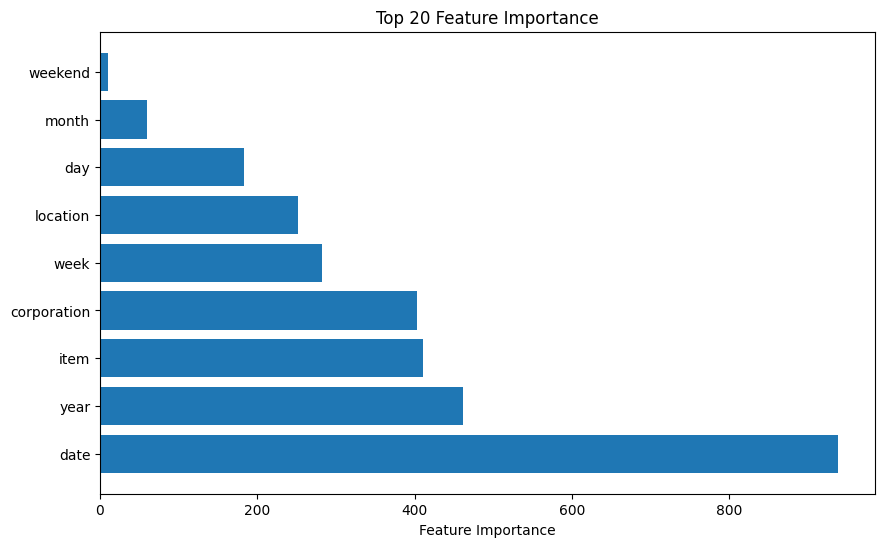

In [20]:
# LightGBM 모델 초기화
model = lgb.LGBMRegressor(verbose = 0,force_col_wise=True)

# 모델을 학습시키기 전에 원본 데이터로 복사하여 중요도 계산
model.fit(feature, target)

# 피쳐 중요도 가져오기
feature_importance = model.feature_importances_

# 중요도가 높은 상위 20개 피쳐 인덱스 가져오기
top_20_feature_indices = feature_importance.argsort()[-25:][::-1]

# 상위 20개 피쳐의 중요도 가져오기
top_20_feature_importance = feature_importance[top_20_feature_indices]

# 상위 20개 피쳐의 이름 가져오기
top_20_feature_names = feature.columns[top_20_feature_indices]

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_20_feature_names, top_20_feature_importance)
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importance')
plt.show()

In [21]:
ID = pd.read_csv('../data/sample_submission.csv').ID

In [22]:
model = model.fit(feature, target)
pred = model.predict(feature_te)

In [23]:
sub = pd.DataFrame({'ID' : ID, 'answer' : pred})

In [24]:
sub.answer = sub.answer.apply(lambda x : 0 if x < 0 else x)

In [25]:
sub

,ID,answer
0,TG_A_J_20230304,3341.832501
1,TG_A_J_20230305,103.383225
2,TG_A_J_20230306,3527.323092
3,TG_A_J_20230307,3527.323092
4,TG_A_J_20230308,3532.220536
...,...,...
1087,RD_F_J_20230327,520.150102
1088,RD_F_J_20230328,520.150102
1089,RD_F_J_20230329,518.748944
1090,RD_F_J_20230330,511.760800


In [27]:
# import joblib
# joblib.dump(model,'../models/gu_lgbm_model.pkl')

['../models/gu_lgbm_model.pkl']

In [45]:
돌하르방

NameError: name '돌하르방' is not defined

In [ ]:
sub.to_csv('sub_20231102_1600.csv', index = False)